# Lecture 05-Preprocessing

**Every cell should self-contained to avoid variable naming conflicts.**

## Scaling

### Ways to Scale Data


In [81]:
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import (train_test_split, cross_val_score, 
                                    GridSearchCV)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, Normalizer,
                                  RobustScaler)
from sklearn.pipeline import make_pipeline, Pipeline

%matplotlib inline

cm2 = ListedColormap(['#0000aa', '#ff2020'])

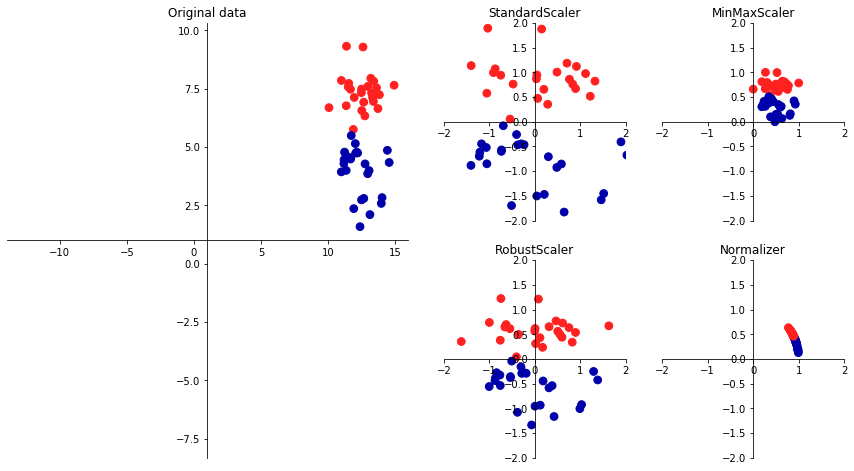

In [43]:
# The following code is derived from 
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/mglearn/plot_scaling.py
def plot_scaling():
    # For make_blobs, "Generate isotropic(各向同性的) Gaussian blobs for clustering."
    # Parameters:
    # n_samples: int or array-like, optional (default=100)
    #     If int, it is the total number of points equally divided among clusters. If array-like,
    #     each element of the sequence indicates the number of samples per cluster.
    # centers: int or array of shape [n_centers, n_features], optional
    #     (default=None) The number of centers to generate, or the fixed center locations. If n_samples
    #     is an int and centers is None, 3 centers are generated. If n_samples is array-like, centers 
    #     must be either None or an array of length equal to the length of n_samples.
    # cluster_std: float or sequence of floats, optional (default=1.0)
    #     The standard deviation of the clusters.
    X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
    X += 3
    
    plt.figure(figsize=(15, 8))
    
    # For plt.subplot2grid, "Create an axis at specific location inside a regular grid."
    # Parameters:
    # shape: sequence of 2 ints
    #     Shape of grid in which to place axis. First entry is number of rows, second entry is number of 
    #     columns.
    # loc: sequence of 2 ints
    #     Location to place axis within grid. First entry is row number, second entry is column number.
    # rowspan: int
    #     Number of rows for the axis to span to the right.
    # colspan: int
    #     Number of columns for the axis to span downwards.
    main_ax = plt.subplot2grid(shape=(2, 4), loc=(0, 0), rowspan=2, colspan=2)
    
    main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm2, s=60)
    maxx = np.abs(X[:, 0]).max()
    maxy = np.abs(X[:, 1]).max()
    
    # Set scale in plot.
    main_ax.set_xlim(-maxx + 1, maxx + 1)
    main_ax.set_ylim(-maxy + 1, maxy + 1)
    main_ax.set_title("Original data")
    
    other_axes = [plt.subplot2grid(shape=(2, 4), loc=(i, j))
                 for j in range(2, 4) for i in range(2)]
    
    for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                      MinMaxScaler(), Normalizer(norm='l2')]):
        # For scaler.fit_transform, "Fit to data, then transform it."
        # Equivalent to `self.fit(X, y, **fit_params).transform(X)`.
        # Parameters:
        # X: numpy array of shape [n_samples, n_features]
        #     Training set.
        # y: numpy array of shape [n_samples]
        #     Target values.
        X_ = scaler.fit_transform(X)
        ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap=cm2, s=60)
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_title(type(scaler).__name__)
        
    other_axes.append(main_ax)

    for ax in other_axes:
        # ax.spines is an OrderedDict with value of type 'matplotlib.spines.Spine'.
        # Spines(脊柱) are the lines connecting the axis tick marks and noting the 
        # boundaries of the data area. They can be placed at arbitrary positions.
        ax.spines['left'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('center')
        ax.spines['top'].set_color('none')
        
        # Set the ticks position (top, bottom, both, default or None).
        # 'both' sets the ticks to appear on both positions, but does not change 
        #     the tick labels.
        # 'default' resets the tick positions to the default: ticks on both positions
        #     labels at bottom.
        # 'none' can be used if you don't want any ticks.
        # 'none' and 'both' affect only the ticks, not the labels.
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
                
plot_scaling()

### Sparse Data

- Data with many zeros - only store non-zero entries.
- Subtracting anything will make the data "dense" (no more zeros) and blow the RAM.
- Only scale, don't center (use MaxAbsScaler)

### Standard Scaler Example

In [48]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test,  y_train,  y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()

# For scaler, only fit features.
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

ridge = Ridge().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)

0.6345884564889053

### Scaling training and test data the same way

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

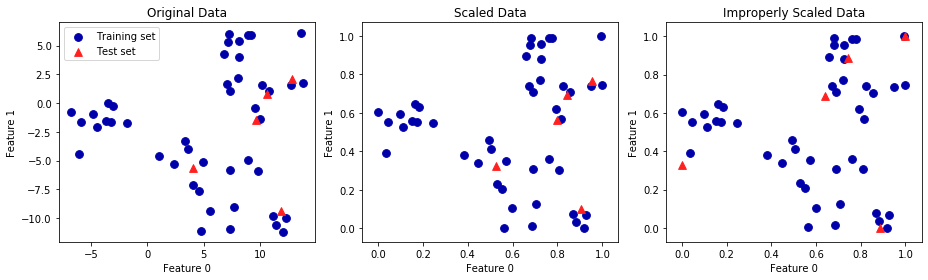

In [56]:
# The following code is derived from 
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/03-unsupervised-learning.ipynb

# Make synthetic data.
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# Split it into training and test sets.
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
# Automatically adjust subplot parameters to give speicied padding.
# Parameters:
# pad: float
#     Padding between the figure edge and the edges of subplots, as a 
#     fraction of the font size. default: 1.08.
fig.tight_layout()

### A note on preprocessing (and pipelines)

In [61]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test,  y_train,  y_test = train_test_split(X, y, random_state=0)

''' Manually create pipeline '''
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

ridge = Ridge().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("Manual pipeline score: ", ridge.score(X_test_scaled, y_test))

''' Use sklearn pipeline '''
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
print("sklearn pipeline score: ", pipe.score(X_test, y_test))

Manual pipeline score:  0.6345884564889053
sklearn pipeline score:  0.6345884564889053


In [66]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test,  y_train,  y_test = train_test_split(X, y, random_state=0)

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
scores = cross_val_score(knn_pipe, X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7455608822349746, 0.10625173604969355)

### Naming Steps

In [67]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
print(knn_pipe.steps)

pipe = Pipeline((("scaler", StandardScaler()),
                 ("regressor", KNeighborsRegressor)))
print(pipe.steps)

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsregressor', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform'))]
(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', <class 'sklearn.neighbors._regression.KNeighborsRegressor'>))


### Pipeline and GridSearchCV

In [71]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test,  y_train,  y_test = train_test_split(X, y, random_state=0)

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}

# For GridSearchCV, 'Exhaustive search over specified parameter value for an estiamtor.'
# Parameters:
# estimator: estimator object.
#     This is assumed to implement the scikit-learn estimator interface. Either estimator
#     needs to provide a `score` function or `scoring` must be passed.
# param_grid: dict or list of dictionaries.
#     Dictionary with parameters names (string) as keys and lists of parameter settings to
#     try as values, or a list of such dictionaries, in which case the grids spanned by 
#     each dictionary in the list are explored. This enables searching over any sequence of
#     parameter settings.
grid = GridSearchCV(knn_pipe, param_grid, cv=10)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 7}
0.5999825126971097


## Discrete features
### Categorical Variables

In [74]:
df = pd.DataFrame(
    {'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
     'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df

,boro,vegan
0,Manhattan,No
1,Queens,No
2,Manhattan,No
3,Brooklyn,Yes
4,Brooklyn,Yes
5,Bronx,No


### Ordinal(序数的) encoding

In [75]:
df = pd.DataFrame(
    {'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
     'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df['boro_ordinal'] = df.boro.astype("category").cat.codes
df

,boro,vegan,boro_ordinal
0,Manhattan,No,2
1,Queens,No,3
2,Manhattan,No,2
3,Brooklyn,Yes,1
4,Brooklyn,Yes,1
5,Bronx,No,0


### One-Hot (Dummy) Encoding

In [76]:
df = pd.DataFrame(
    {'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
     'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})

# For get_dummies, Convert categorical variable into dummy/indicator variables.
# Parameters:
# data: array-like, Series, or DataFrame
#     Data of which to get dummy indicators.
# columns: list-like, default None
#     Column names in the DataFrame to be encoded. If columns is None then all
#     the columns with `object` or `category` dtype will be converted.
pd.get_dummies(df)

,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens,vegan_No,vegan_Yes
0,0,0,1,0,1,0
1,0,0,0,1,1,0
2,0,0,1,0,1,0
3,0,1,0,0,0,1
4,0,1,0,0,0,1
5,1,0,0,0,1,0


In [78]:
df = pd.DataFrame(
    {'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
     'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
pd.get_dummies(df, columns=['boro'])

,vegan,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,No,0,0,1,0
1,No,0,0,0,1
2,No,0,0,1,0
3,Yes,0,1,0,0
4,Yes,0,1,0,0
5,No,1,0,0,0


### Pandas Categorical Columns

In [79]:
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan',
                            'Brooklyn', 'Brooklyn', 'Bronx']})

# 
df['boro'] = pd.Categorical(df.boro, categories=['Manhattan', 'Queens', 'Brooklyn',
                                                'Bronx', 'Staten Island'])
pd.get_dummies(df)

,salary,boro_Manhattan,boro_Queens,boro_Brooklyn,boro_Bronx,boro_Staten Island
0,103,1,0,0,0,0
1,89,0,1,0,0,0
2,142,1,0,0,0,0
3,54,0,0,1,0,0
4,63,0,0,1,0,0
5,219,0,0,0,1,0


### Count/Target-Based Encoding
- For high cardinality(基数) categorical features
- Example: US states, given low samples
- Instead of 50 one-hot variables, one "response encoded" variable.
- For regression:
    - "people in this state have an average response of y"
- Binary classification: - "people in this state have likelihood p for class 1"
- Multiclass: - One feature per class: probability distribution.

*Lecture notes:* 
- This works well in practice, i.e. kaggle
- This means change a categorical variable to a continuous variable.
- Don't leak the target information.

### Example: Adult census, native-country

In [84]:
data = pd.read_csv("data/adult.csv")
display(data.columns)
display(data['native-country'].value_counts())
display(data.head())

Index(['Unnamed: 0', 'age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Replace the `native-country` feature with how often people from this
# country has `income > 50k`.